In [27]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [28]:
class State(TypedDict):
    num_one: int
    num_two: int
    operation_one: str
    result_one: int
    num_three: int
    num_four: int
    operation_two: str
    result_two: int

In [29]:
def add_node_one(state: State) -> State:
    """Node that performs addition."""
    new_state = State(result_one= state['num_one'] + state['num_two'])
    return new_state
def subtract_node_one(state: State) -> State:
    """Node that performs subtraction."""
    new_state = State(result_one= state['num_one'] - state['num_two'])
    return new_state
def add_node_two(state: State) -> State:
    """Node that performs addition."""
    new_state = State(result_two= state['num_three'] + state['num_four'])
    return new_state
def subtract_node_two(state: State) -> State:
    """Node that performs subtraction."""
    new_state = State(result_two= state['num_three'] - state['num_four'])
    return new_state

In [30]:
def router_one(state: State) -> State:
    """Node that routes to the appropriate operation node based on the operation."""
    if state['operation_one'] == '+':
        return "add_node_one_call"
    elif state['operation_one'] == '-':
        return 'subtract_node_one_call'
    else:
        raise ValueError("Unsupported operation")
    
def router_two(state: State) -> State:
    """Node that routes to the appropriate operation node based on the operation."""
    if state['operation_two'] == '+':
        return "add_node_two_call"
    elif state['operation_two'] == '-':
        return 'subtract_node_two_call'
    else:
        raise ValueError("Unsupported operation")

In [31]:
graph_builder = StateGraph(State)
graph_builder.add_node("add_node_one", add_node_one)
graph_builder.add_node("subtract_node_one", subtract_node_one)
graph_builder.add_node("add_node_two", add_node_two)
graph_builder.add_node("subtract_node_two", subtract_node_two)
graph_builder.add_node("router_one", lambda state:state)
graph_builder.add_node("router_two", lambda state:state)

In [32]:
graph_builder.add_edge(START, "router_one")
graph_builder.add_conditional_edges("router_one", router_one, {
    "add_node_one_call": "add_node_one",
    "subtract_node_one_call": "subtract_node_one"
}
)
graph_builder.add_edge("add_node_one", "router_two")
graph_builder.add_edge("subtract_node_one", "router_two")

graph_builder.add_conditional_edges("router_two", router_two, {
    "add_node_two_call": "add_node_two",
    "subtract_node_two_call": "subtract_node_two"
}
)

graph_builder.add_edge("add_node_two", END)
graph_builder.add_edge("subtract_node_two", END)

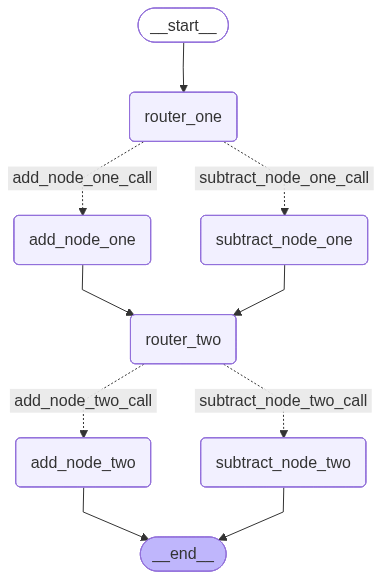

In [33]:
from IPython.display import Image, display
app = graph_builder.compile()
display(Image(app.get_graph().draw_mermaid_png()))

In [37]:
init_state = State(
    num_one=5, num_two=3, operation_one='+',
    num_three=10, num_four=4, operation_two='-')
result = app.invoke(init_state)

print(f"Output: {result['result_one']}")  # Output: 8
print(f"Output: {result['result_two']}")  # Output: 6

Output: 8
Output: 6
